# 21. GRADUATE ADMISSIONS: DATA EXPLORATION
---

## 1. Introducing the Data
- **Source**: [Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions)
- **Context**: Prediction of Graduate Admissions from important parameters
- **Content**: The dataset contains the following parameters:
    - GRE Scores ( out of 340 )
    - TOEFL Scores ( out of 120 )
    - University Rating ( out of 5 )
    - Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
    - Undergraduate GPA ( out of 10 )
    - Research Experience ( either 0 or 1 )
    - Chance of Admit ( ranging from 0 to 1 )
- **Citation**: *Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019*
- **License**: CC0: Public Domain
- **Dataset**:
    - Source file: `Admission_Predict_Ver1.1.csv`
    - Saved as: `Admission_1.1`

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

admission = pd.read_csv('data/Admission_1.1.csv')
print(admission.shape)
print(admission.columns)
admission.head()

(500, 9)
Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Before we proceed, let's do a couple things:
- The `Serial No.` is not useful for our purpose, we will drop it
- The `LOR` column has a space at the end, we will remove it. 

In [2]:
admission['LOR'] = admission['LOR ']
admission_1 = admission.drop(['Serial No.', 'LOR '], axis=1)
print(admission_1.shape)
admission_1.columns

(500, 8)


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA',
       'Research', 'Chance of Admit ', 'LOR'],
      dtype='object')

## 2. Train-Test Splitting

In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(admission_1, test_size=0.2, random_state=42)
print('Train:', train.shape, '\n', 'Test:', test.shape)

Train: (400, 8) 
 Test: (100, 8)


## 3. Understanding the Data Types
From sampling the first 5 rows above, it doesn't look like we have any columns in string form. They are in either `integer` or `float`

In [4]:
train.dtypes.value_counts()

float64    4
int64      4
dtype: int64

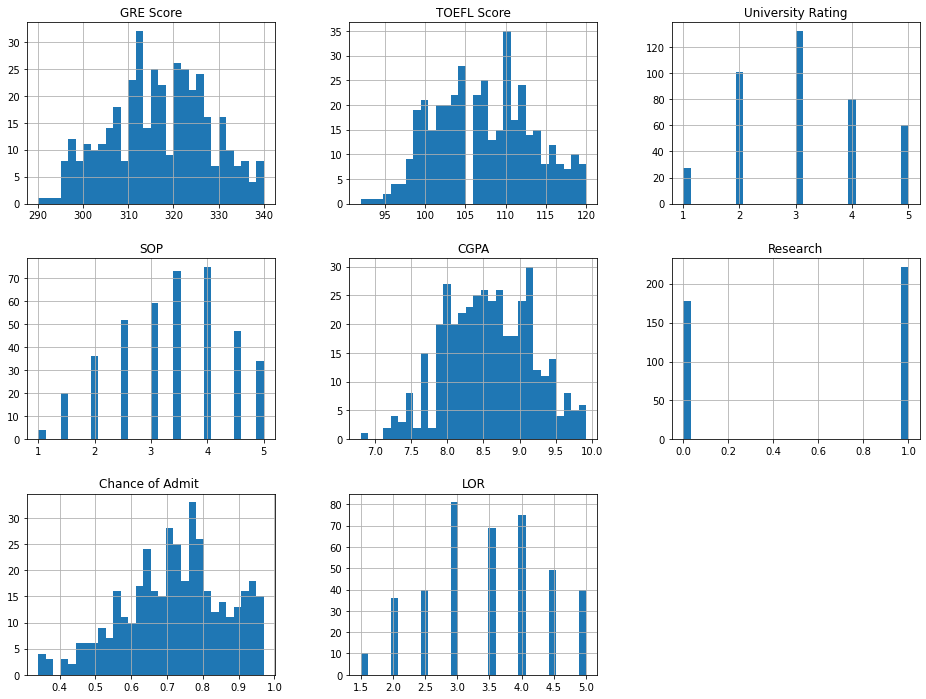

In [5]:
import matplotlib.pyplot as plt

train.hist(bins=30, figsize=(16,12))
plt.show()

- From the histograms above, we can see that there are 4 `continuous` attributes:
    - `GRE Score`
    - `TOEFL Score`
    - `CGPA`
    - `Chance of Admit`
- The other 4 attributes are `ordinal`:
    - `University Rating` - 5 scales: 1-5
    - `SOP` - 9 scales: 1-5
    - `LOR` - 8 scales: 1.5-5.0
    - `Research` - 2 scales = binary: 0-1
    
    
## 4. Exploring Ordinal Data

In [6]:
ord_cols = ['University Rating', 'SOP', 'LOR', 'Research']
for col in ord_cols: 
    print(train[col].value_counts())

3    132
2    101
4     80
5     60
1     27
Name: University Rating, dtype: int64
4.0    75
3.5    73
3.0    59
2.5    52
4.5    47
2.0    36
5.0    34
1.5    20
1.0     4
Name: SOP, dtype: int64
3.0    81
4.0    75
3.5    69
4.5    49
2.5    40
5.0    40
2.0    36
1.5    10
Name: LOR, dtype: int64
1    222
0    178
Name: Research, dtype: int64


## 5. Exploring Basic Stats

In [9]:
stats = train.describe().T
stats['max-min'] = train.max()-train.min()
stats

,count,mean,std,min,25%,50%,75%,max,max-min
GRE Score,400.0,316.728,10.969,290.00,309.000,317.000,324.25,340.00,50.00
TOEFL Score,400.0,107.335,6.091,92.00,103.000,107.000,112.00,120.00,28.00
University Rating,400.0,3.112,1.146,1.00,2.000,3.000,4.00,5.00,4.00
SOP,400.0,3.375,0.987,1.00,2.500,3.500,4.00,5.00,4.00
CGPA,400.0,8.581,0.601,6.80,8.138,8.565,9.04,9.92,3.12
Research,400.0,0.555,0.498,0.00,0.000,1.000,1.00,1.00,1.00
Chance of Admit,400.0,0.724,0.141,0.34,0.637,0.730,0.82,0.97,0.63
LOR,400.0,3.480,0.922,1.50,3.000,3.500,4.00,5.00,3.50


The max-min range is small for pretty much all of the attributes. We might have to scale GRE and TOEFL score, though, or we can discretize all of the continuous attributes and put them on the same scale as some of the ordinal attributes. 

## 6. Visualizing Outliers

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_1 = scaler.fit_transform(train)
train_1 = pd.DataFrame(train_1, 
                             columns=train.columns)
train_1_ = train_1.describe().T
train_1_['max_min'] = train_1.max() - train_1.min()
train_1_

,count,mean,std,min,25%,50%,75%,max,max_min
GRE Score,400.0,-1.928e-15,1.001,-2.440,-0.705,0.025,0.687,2.124,4.564
TOEFL Score,400.0,1.020e-15,1.001,-2.521,-0.713,-0.055,0.767,2.082,4.602
University Rating,400.0,1.704e-16,1.001,-1.846,-0.972,-0.098,0.775,1.649,3.495
SOP,400.0,-6.939e-17,1.001,-2.409,-0.888,0.127,0.634,1.648,4.057
CGPA,400.0,-2.545e-16,1.001,-2.965,-0.738,-0.026,0.765,2.230,5.195
Research,400.0,1.532e-16,1.001,-1.117,-1.117,0.895,0.895,0.895,2.012
Chance of Admit,400.0,6.678e-16,1.001,-2.737,-0.617,0.041,0.683,1.751,4.488
LOR,400.0,-6.592e-18,1.001,-2.151,-0.522,0.022,0.565,1.651,3.803


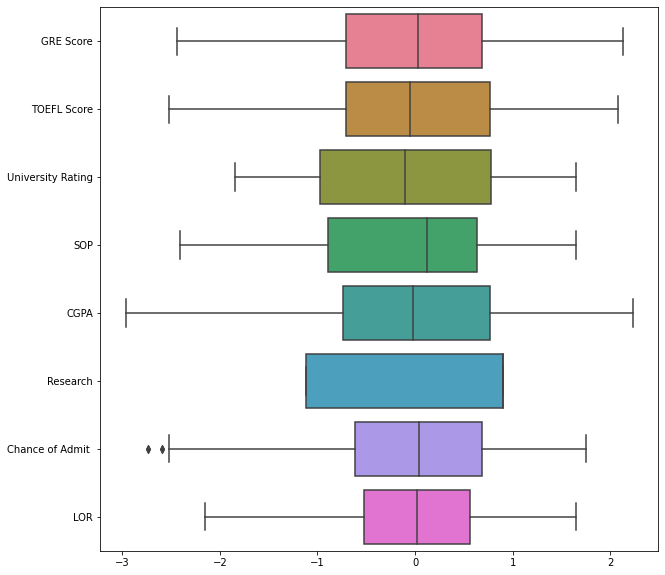

In [11]:
import seaborn as sns

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=train_1, orient="h", palette="husl")

So there are virtually no outliers in our dataset, except for a couple 